# Topics

**Math Power-Up** - Number theory essentials - Sets, functions, and sequences - Induction: the proof technique - Logic fundamentals

**Probability & Statistics** - Probability of events - Conditional probability: the plot thickens - Discrete random variables - Statistics overview

# Math

## Prime Numbers

A prime number is a natural number greater than 1 that has no positive divisors other than 1 and itself.

Every number greater than 1 is either prime or can be factored into primes.

**Prime gaps:** Prime numbers become less frequent as numbers increase, with arbitrarily large gaps between them. Still, there are infinitely many primes (Proven by **Euclid**).

## Applications

RSA encryption, algorithms, combinatorics, game theory, etc.

## Sieve of Eratosthenes

One of the most efficient algorithms to find all prime numbers up to a given limit nn. It works by iteratively marking the multiples of each prime number starting from 2.

In [95]:
def sieve_of_eratosthenes(n):
    primes = [True] * (n + 1)
    p = 2
    while p * p <= n:
        if primes[p]:
            for i in range(p * p, n + 1, p):
                primes[i] = False
        p += 1
    return [p for p in range(2, n + 1) if primes[p]]

In [97]:
sieve_of_eratosthenes(5)

[2, 3, 5]

## GCD - Greatest Common Divisor

The GCD of a sequence of numbers is defined as the greatest integer that divides all the numbers in the sequence evenly.
For example, the GCD of the sequence [4,6,16] is 2.

In [100]:
def gcd_req(a, b):
    if a == 0:
        return b
    return gcd(b % a, a)

In [19]:
def gcd_sub(a, b):
    while a != b :
        if a > b:
            a = a - b
        else:
            b = b - a
    return a

In [51]:
gcd_req(56, 144)

8

In [53]:
gcd_sub(56, 144)

8

### Number of Subarrays With GCD Equal to K

https://leetcode.com/problems/number-of-subarrays-with-gcd-equal-to-k/description/?envType=problem-list-v2&envId=math

## LCM - Least Common Multiple

The smallest number that both aa and bb divide evenly into.

- LCM is commonly used in problems that involve syncing cycles or periodic events (e.g., finding when two lights blink at the same time, or aligning patterns).
- It is also useful for finding a common denominator when adding or subtracting fractions.

In [60]:
#LCM Using GCD Method
import math

def lcm(a, b):
    return abs(a * b) // math.gcd(a, b)

In [62]:
print(lcm(12, 18))

36


In [64]:
#LCM Using Prime Factorization
from collections import Counter

def prime_factors(n):
    factors = []
    i = 2
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def lcm_prime_factorization(a, b):
    factors_a = Counter(prime_factors(a))
    factors_b = Counter(prime_factors(b))
    
    combined_factors = factors_a | factors_b
    result = 1
    for prime, power in combined_factors.items():
        result *= prime ** power
    return result

In [66]:
print(lcm_prime_factorization(12, 18))

36


The prime factorization method is conceptually important but less efficient for very large numbers compared to the GCD method.

### Number of Subarrays With LCM Equal to K

https://leetcode.com/problems/number-of-subarrays-with-lcm-equal-to-k/description/?envType=problem-list-v2&envId=math

## Modular Arithmetic Overview

**a mod n**

Where
- a is the dividend
- n is the modulus (the divisor)
- the result is the remainder after dividing a by n

Examples:
- 17 mod 5 = 2
- 10 mod 3 = 1

**Addition Modulo n:**

(a + b) mod n = (( a mod n) + (b mod n)) mod n

**Subtraction Modulo n**

(a − b) mod n = ((a mod n) − (b mod n) + n) mod n

**Multiplication Modulo n:**

(a ⋅ b) mod n = ((a mod n) ⋅ (b mod n)) mod n

**Exponentiation Modulo n (Modular Exponentiation):**

(a$^b$) mod n

If b = c + d, then
(a$^b$) mod n = ((a$^c$ mod n) ⋅ (a$^d$ mod n)) mod n

**Division in Modular Arithmetic:**

To divide in modular arithmetic, you need the modular inverse of a number, which exists only if the number and the modulus are coprime (i.e., their GCD is 1).

## Modular Inverse

The modular inverse of a number a mod n is a number b such that:
(a ⋅ b) mod n = 1 mod n

The modular inverse of a mod n can be found if gcd(a, n)=1 using the **Extended Euclidean Algorithm**.

## Extended Euclidean Algorithm

The Extended Euclidean Algorithm is a version of GCD algorithm that also computes the coefficients x and y such that:

a⋅x + b⋅y = gcd(a, b)

Here’s how it works step by step:

- Apply the Euclidean Algorithm to find the GCD of a and b
- Work backwards to express the GCD as a linear combination of a and b (this is where we find the coefficients x and y)

https://www.extendedeuclideanalgorithm.com/xea.php

## Steps to Find Modular Inverse Using Extended Euclidean Algorithm

- Apply the Extended Euclidean Algorithm to a and n to find integers x and y such that:
    a⋅x + n⋅y = gcd(a, n)
- If gcd(a, n) = 1, then x (the coefficient of a) is the modular inverse of a mod n.
- Ensure that x is positive by taking x mod n (if x is negative, add n to make it positive).

### Exercise

Find the modular inverse of:
- 27 mod 59

## Solution

**Step 1: Apply the Euclidean Algorithm**

We use the Euclidean Algorithm to find the GCD of 27 and 59:
59 = 2⋅27 + 5
27 = 5⋅5 + 2
5 = 2⋅2 + 1
2 = 2⋅1 + 0

Since the remainder is now 0, the GCD is 1, which means 27 and 59 are coprime, so the inverse exists.

**Step 2: Work Backwards (Extended Euclidean Algorithm)^^

Now, we express 1 as a linear combination of 27 and 59 by working backwards through the Euclidean Algorithm:

From the second-to-last equation:
1 = 5 − 2⋅2

Substitute 2 = 27 − 5⋅5 from the previous equation:
1 = 5 − 2⋅(27 − 5⋅5) = 5 − 2⋅27 + 10⋅5 = 11⋅5 − 2⋅27

Now, substitute 5 = 59 − 2⋅27 from the first equation:
1 = 11⋅(59 − 2⋅27) − 2⋅27 = 11⋅59 − 22⋅27 − 2⋅27 = 11⋅59 − 24⋅27

Thus, 1 = 11⋅59 + (−24)⋅27

**Step 3: Make x Positive**

The inverse is x = −24, but we need the positive equivalent modulo 59:
x = −24 mod  59 = 59−24 = 35

Final Answer:

The modular inverse of 27 mod  59 35.

You can verify this by checking:
27⋅35 = 945
945 mod 59 = 1

In [127]:
def gcd_extended(a, b):
    if a == 0:
        return b, 0, 1
    gcd, x1, y1 = gcd_extended(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return gcd, x, y

def mod_inverse(a, n):
    gcd, x, y = gcd_extended(a, n)
    if gcd != 1:
        return None  # Modular inverse doesn't exist if a and n are not coprime
    else:
        return x % n


## Applications

- Cryptography: Modular arithmetic is the foundation of cryptographic algorithms like RSA, where large prime numbers and modular inverses are essential.
- Hashing: Many hash functions use modular arithmetic to map large values into a fixed range.
- Random Number Generation: Modular arithmetic is used in linear congruential generators, which generate sequences of random numbers.

## RSA Example


Choose p = 3 and q = 11

Compute n = p * q = 3 * 11 = 33

Compute φ(n) = (p - 1) * (q - 1) = 2 * 10 = 20

> The totient function φ(n) represents the number of integers from 1 to n that are coprime (i.e., have no common factors other than 1) with n.

Choose e such that 1 < e < φ(n) and e and φ (n) are coprime. Let e = 7

Compute a value for d such that (d * e) % φ(n) = 1. One solution is d = 3 [(3 * 7) % 20 = 1]

Public key is (e, n) => (7, 33)

Private key is (d, n) => (3, 33)

The encryption of m = 2 is c = 27 % 33 = 29

The decryption of c = 29 is m = 293 % 33 = 2

**Source**:
https://www.cs.utexas.edu/~mitra/honors/soln.html


## Sets

A set is a collection of elements without repetition. Sets are often used to store unique values and to perform operations such as union, intersection, and difference.

### Set Operations:

- Union (A∪B): The set of all elements in either set A or set B (or both)
- Intersection (A∩B): The set of all elements common to both A and B
- Difference (A−B): The set of all elements in A that are not in B
- Symmetric Difference (AΔB): The set of elements in either A or B, but not in both
- Subset: A⊆B means every element of A is also an element of B

In [146]:
A = {1, 2, 3, 4}
B = {3, 4, 5, 6}

# Union
union = A | B  

# Intersection
intersection = A & B 

# Difference
difference = A - B  

# Symmetric Difference
sym_difference = A ^ B 

print("Union:", union)
print("Intersection:", intersection)
print("Difference:", difference)
print("Symmetric Difference:", sym_difference)


Union: {1, 2, 3, 4, 5, 6}
Intersection: {3, 4}
Difference: {1, 2}
Symmetric Difference: {1, 2, 5, 6}


## Functions

- Injective (One-to-One): A function f is injective if different elements of A map to different elements of B, i.e., if f(x1) = f(x2), then x1 = x2
  > Imagine a room full of cats, and you are giving each cat a unique name. If you follow the rule that no two cats can have the same name, then this is an injective function!
- Surjective (Onto): A function f is surjective if every element of B is the image of at least one element in A, i.e., for every y∈B, there exists x∈A such that f(x) = y
   > Imagine you're at a pizza party, and there's a rule: every guest must get at least one slice of pizza, and all the pizza must be eaten. There might be a few slices of pizza hoarded by one person, but as long as every slice gets eaten, it's surjective!
- Bijective: A function is bijective if it is both injective and surjective. This means every element in A maps to a unique element in B and covers all elements in B
  > Imagine a school dance where every student must have exactly one dance partner. No two students have the same partner (no cheating!), and every student is dancing with someone. If one student is dancing with two partners, it’s no longer injective (that's a dance disaster!). If some students are left without partners, it’s not surjective (they're stuck doing the lonely shuffle).

### Injective, Surjective, or Both?

- Consider the function f(x) = x$^2$ from R → R. Is it injective, surjective, or neither?

    Domain: RR (all real numbers)
    Codomain: RR (all real numbers)

    Consider two values:

    f(2) = 4
    f(−2) = 4

    Here, different inputs 2 and −2 give the same output (4), so f(x) = x$^2$ is not injective over the real numbers. It fails the injectivity test because there are pairs of different numbers (like 2 and -2) that result in the same value.

    There's no x∈R such that f(x) = −1.

    Therefore, the function is not surjective over R because negative numbers in the codomain cannot be mapped from any real number in the domain.

- Consider the function f(x) = 2x + 1 from Z → Z. Is it injective, surjective, or bijective?

    Domain: Z (all integers)
    Codomain: Z (all integers)

    For f(x) = 2x + 1, assume f(x1) = f(x2). Then:
    2x1 + 1 = 2x2 + 1

    Simplifying:
    2x1 = 2x2 ⇒ x1 = x2

    Thus, f(x) = 2x + 1 is injective because different inputs lead to different outputs.

    Let y = 2x + 1. To solve for x, we get:
    x=(y − 1)/2

    For x to be an integer, y − 1 must be divisible by 2. This implies that y must be odd. Hence, f(x) = 2x + 1 only produces odd integers.

## Sequences

A sequence is an ordered list of elements, often following a particular rule or pattern. Common sequences include arithmetic sequences and geometric sequences.

- Arithmetic Sequence: A sequence where the difference between consecutive terms is constant
- Geometric Sequence: A sequence where each term is obtained by multiplying the previous term by a constant
- Fibonacci Sequence: A sequence where each term is the sum of the previous two terms

In [149]:
def fibonacci(n):
    fib_seq = [0, 1]
    for i in range(2, n):
        next_term = fib_seq[-1] + fib_seq[-2]
        fib_seq.append(next_term)
    return fib_seq

In [151]:
fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

## Induction: The Proof Technique

Mathematical induction is a technique used to prove that a statement P(n) is true for all natural numbers n. The process involves two key steps:

1. Base Case: Prove that the statement is true for the smallest value of n, often n = 1 (or n=0 in some cases).
2. Inductive Step: Assume the statement is true for n = k (the inductive hypothesis), and then prove that the statement is also true for n = k + 1.

If both steps hold, the statement P(n) is true for all natural numbers n.

### Example

Prove that the sum of the first n odd numbers is n$^2$.

Proposition P(n):
1 + 3 + 5 + ⋯ + (2n − 1) = n$^2$

Base Case (n=1):
1 = 1$^2$

So the base case is true.

Inductive Hypothesis: Assume that the sum of the first k odd numbers is k$^2$, i.e.,
1 + 3 + 5 + ⋯ + (2k − 1) = k$^2^

Inductive Step: Prove that the sum of the first k + 1 odd numbers is (k + 1)$^2$. Start with the sum of the first k odd numbers:
1 + 3 + 5 + ⋯ + (2k − 1) + **(2(k + 1) − 1)**

By the inductive hypothesis, the sum of the first k odd numbers is k$^2$. So we add the next odd number:
k$^2$ + **(2k + 1)** = (k + 1)$^2$

Hence, P(k + 1) is true.

Conclusion: By induction, the sum of the first nn odd numbers is n$^2$ for all n.



## Logic Fundamentals

Propositional logic deals with **propositions** (statements that are either true or false) and logical connectives that combine these propositions.

- P∧Q is true if both P and Q are true
- P∨Q is true if at least one of P or Q is true
- ¬P is true if P is false
- P → Q is true unless P is true and Q is false
- P ↔ Q is true if both P and Q have the same truth value (either both true or both false).

## Common Logical Equivalences

1. De Morgan’s Laws:

¬(P∧Q) ≡ (¬P∨¬Q)
¬(P∨Q) ≡ (¬P∧¬Q)

2. Double Negation:

¬(¬P) ≡ P

3. Distributive Laws:

P∧(Q∨R) ≡ (P∧Q)∨(P∧R)
P∨(Q∧R) ≡ (P∨Q)∧(P∨R)
        
4. Implication Equivalence:

P→Q ≡ ¬P∨Q

## Quantifiers

- Universal Quantifier (∀)

> "For all" or "For every."

- Existential Quantifier (∃):

> "There exists" or "At least one." 

## Logical Argument

A logical argument consists of premises (assumptions) and a conclusion. The argument is valid if the conclusion logically follows from the premises.

**Modus Ponens**:

If P → Q and P, then Q.

**Modus Tollens**:

If P → Q and ¬Q, then ¬P

## Logical Fallacies

- Affirming the Consequent:

Logical Fallacy: If P → Q, and Q is true, then P must be true (which is incorrect).

> If I have a cat (P), I have pets (Q). I have pets (Q is true), which means that I have a cat.
> 
> Wait... I may have a dog or a parrot!

- Denying the Antecedent:

Logical Fallacy: If P → Q, and P is false, then Q must be false (which is incorrect).

> If I’m a wizard, I can cast spells. I’m not a wizard. Therefore, I can’t use a remote control.
>
> Wait a second... just because you aren’t a wizard doesn’t mean you can’t work the TV remote. Who needs magic when you’ve got batteries?

# Probability & Statistics

## Probability of events

**Probability** is a measure of how likely an event is to occur. It ranges from 0 to 1.

P(A) = (Total number of possible outcomes) / (Number of favorable outcomes)

P(heads) = 1/2

## Sample Space and Events

Sample Space (S): The set of all possible outcomes of a random experiment.

Example: For rolling a die, the sample space is S={1, 2, 3, 4, 5, 6}.

Event: A subset of the sample space, which represents outcomes of interest.

Example: The event of rolling an even number is A={2, 4, 6}.

**Types of Events**:

Simple Event: An event with a single outcome.

Example: Rolling a 4 on a die.

Compound Event: An event with multiple outcomes.

Example: Rolling an even number (which includes 2, 5, and 6):

https://codeforces.com/problemset/problem/9/A

**Complementary Events**

The complement of an event A (denoted as A$^c$) is the event that A does not happen.

The probability of the complement is:

P(A$^c$) = 1 − P(A)

**Example**:

If the probability of raining tomorrow is 0.3, the probability of it not raining is:

P(not raining) = 1 − 0.3 = 0.7

## Addition Rule of Probability

If you want to find the probability that one or the other of two events happens (denoted as A or B), use the addition rule:

P(A∪B) = P(A) + P(B) − P(A∩B)

**Example**:

Suppose the probability of drawing a red card from a deck of cards is P(Red) = 1/2, and the probability of drawing a face card is P(Face) = 12/52.

If 6 of the face cards are red, the probability of drawing a red card or a face card is:

P(Red∪Face) = 26/52+12/52−6/52=32/52

**Example**:

A jar contains 4 red, 5 blue, and 6 green marbles. What is the probability of randomly selecting a green marble?

## Independent and Dependent Events

Two events A and B are **independent** if the occurrence of one does not affect the occurrence of the other.

- Multiplication Rule for Independent Events:
P(A∩B) = P(A)⋅P(B)

> Dice rolls are independent

Two events A and B are **dependent** if the outcome of one affects the outcome of the other.

> Imagine you have a jar filled with 10 cookies: 5 chocolate chip and 5 oatmeal. You reach into the jar, grab a cookie, and then eat it without putting it back. Now, you're about to grab another cookie.
>
> Event A: You grab a chocolate chip cookie first;
>
> Event B: You grab an oatmeal raisin cookie second.
>
> Since you ate the first cookie and didn’t put it back, the probability of grabbing the second cookie is affected by what you grabbed first. These events are dependent, because the total number of cookies is reduced after you take the first one.

## Conditional Probability

Conditional probability is the probability that event A happens given that event B has already occurred. It is denoted P(A∣B) and calculated as:

P(A∣B)=P(A∩B)P(B)

> Suppose you have a mischievous friend who is notorious for stealing cookies when left alone in the kitchen.
>
> Event A: Your friend goes into the kitchen;
> Event B: Cookies go missing.
>
> Suppose that P(Cookies missing∣Friend in kitchen) = 0.9
> 
> However, if your friend doesn’t go into the kitchen, the probability that cookies go missing is much lower:
>
> P(Cookies missing∣Friend not in kitchen) = 0.1
>
> If the overall probability of missing cookies is 0.3, then
>
> P(Cookies missing) = P(Cookies missing∣Friend in kitchen)⋅P(Friend in kitchen) + P(Cookies missing∣Friend not in kitchen)⋅P(Friend not in kitchen)
>
> 0.3 = 0.9⋅p + 0.1⋅(1 − p)
>
> 0.2 = 0.8p
>
> p = 0.25
>
> Here p is the probability that your friend is in the kitchen.
>
> When your friend is in the kitchen, there’s a 90% chance that cookies go missing.
> 
> When your friend is not in the kitchen, there’s only a 10% chance of missing cookies.

## Discrete Random Variables

A **random variable** is a numerical outcome of a random experiment. It assigns a number to each possible outcome of the experiment.

A **discrete random** variable is a random variable that can take on a finite or countably infinite set of values. Each value has a specific probability associated with it.

> The random variable X represents the result of rolling a die.
>
> Possible values: X∈{1, 2, 3, 4, 5, 6}

## Probability Mass Function

The probability mass function (PMF) of a discrete random variable assigns a probability to each possible value the variable can take. For a discrete random variable X, the PMF is denoted by P(X=x), which gives the probability that X takes the value x.

**Properties of PMFs**:

- 0≤P(X = x)≤1 for all x.

- The sum of all probabilities must equal 1:

    ∑P(X = x) = 1

**Example**:

Let X be the random variable representing the outcome of a die roll. The PMF of X is:

P(X = x) = 1/6, for x∈{1, 2, 3, 4, 5, 6}

This is because each side of a fair die has an equal chance of landing face up.

## Cumulative Distribution Function

The cumulative distribution function (CDF) of a discrete random variable X gives the probability that X is less than or equal to a specific value x:

F$_X$(x) = P(X≤x)

**Example**:

Let’s calculate the CDF for a die roll. We know the PMF, so the CDF is:

F$_X$(1) = P(X≤1) = 1/6

F$_X$(2) = P(X≤2) = 1/6 + 1/6 = 1/3

F$_X$(3) = P(X≤3) = 3/6 = 1/2, and so on, until:

F$_X$(6) = P(X≤6) = 1

## Expected Value (Mean)

The expected value (or mean) of a discrete random variable X is a measure of the central tendency or "average" value of X. It is calculated by summing each possible value of XX multiplied by its corresponding probability:

E(X) = ∑x⋅P(X = x)

> You’re at a pizza party, and the number of pizza slices you get is determined by a spin-the-wheel game. The wheel gives you 1, 2, or 3 slices, but the chances aren’t equal:
>
> P(1 slice)=0.2
> 
> P(2 slices)=0.5
> 
> P(3 slices)=0.3
>
> Expected Value of Pizza Slices:
> 
> E(S)=1⋅0.2+2⋅0.5+3⋅0.3
> 
> E(S)=0.2+1+0.9=2.1
>
> So on average, you’ll get 2.1 slices of pizza, which is fantastic!

## Variance and Standard Deviation

The variance of a discrete random variable XX measures how spread out the values of XX are from the mean E(X)E(X). The variance is denoted as Var(X)Var(X) and is calculated as:
Var(X) = E[(X − E(X))$^2$] = ∑x(x − E(X))$^2$⋅P(X = x)

The standard deviation is the square root of the variance:
SD(X) = $\sqrt{Var(X)}$

## Statistics Overview

Statistics is the branch of mathematics that deals with collecting, organizing, analyzing, interpreting, and presenting data.

- Descriptive Statistics: Summarizing and organizing data so it can be understood easily (e.g., calculating averages, percentages, charts)
- Inferential Statistics: Drawing conclusions about a population based on a sample of data (e.g., hypothesis testing, confidence intervals)

**Median**:

The median is the middle value when data is ordered from least to greatest.

- If there’s an odd number of values, it’s the middle one.
- If there’s an even number of values, it’s the average of the two middle ones.

Example: In the data set [1, 3, 4, 6, 9], the median is 4.

**Mode**:

The mode is the most frequent value in the data set.

Example: In the data set [1, 2, 2, 3, 4], the mode is 2 because it appears twice.

**Range**:

The range is the difference between the largest and smallest values.

**Variance**:

The variance measures the spread of the data around the mean. It’s the average of the squared differences from the mean.

**Standard Deviation**:

The standard deviation is the square root of the variance and represents the average distance from the mean.

Example: If a test’s standard deviation is high, the scores are widely spread out; if it’s low, the scores are tightly grouped around the mean.

## Inferential Statistics

1. Hypothesis Testing:

This is used to test whether a certain statement (hypothesis) about a population parameter is true.

- Null Hypothesis (H0): A statement that there is no effect or no difference.
- Alternative Hypothesis (HA): The statement we want to test, suggesting there is an effect or difference.

Example: Testing whether a new drug is more effective than the current drug.

- H0: The new drug is no better than the old one.
- HA: The new drug is better than the old one.

2. Confidence Intervals:

A confidence interval gives a range of values that is likely to contain a population parameter (like the mean) with a certain level of confidence (e.g., 95%).

Example: If we calculate a 95% confidence interval for the average weight of students to be [65,75] kg, we are 95% confident that the true average weight lies between 65 and 75 kg.

3. P-Value:

The p-value is the probability of observing the data we have, assuming the null hypothesis is true. If the p-value is small (typically less than 0.05), we reject the null hypothesis.

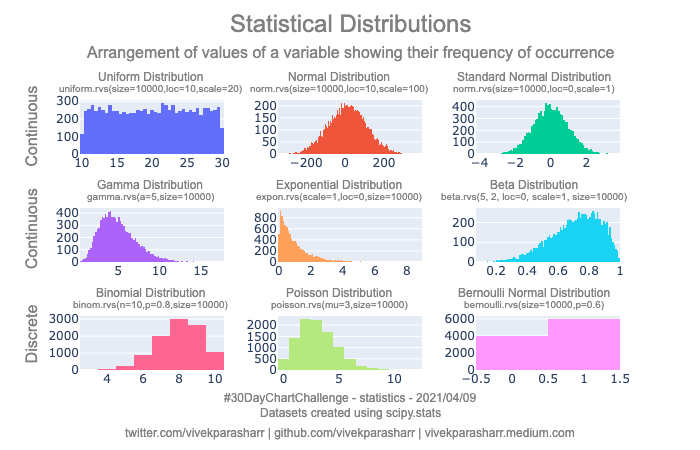

## Normal Distribution

A normal distribution is a continuous probability distribution that is symmetric around its mean, meaning the data near the mean are more frequent in occurrence than data far from the mean.

The standard normal distribution is a specific form of the normal distribution with:

- Mean (μ) = 0
- Standard deviation (σ) = 1

**Properties**:

- Symmetry: The distribution is symmetric around the mean (which is 0), meaning that the left and right sides of the curve are mirror images.
- Total Area Under the Curve: The total area under the standard normal curve is 1. This represents the entire probability space.
- Empirical Rule (68-95-99.7 Rule):

    68% of the data lies within 1 standard deviation of the mean (−1<x<1).
  
    95% of the data lies within 2 standard deviations of the mean (−2<x<2).
  
    99.7% of the data lies within 3 standard deviations of the mean (−3<x<3).

This means most of the data is concentrated close to the mean, and the farther away from the mean you go, the rarer the data points.

**Z-scores**

A z-score measures how many standard deviations an individual data point is from the mean. It is calculated as:
z = (x−μ)/ σ

Where:

- x is a value from the dataset.
- μ is the mean of the dataset.
- σ is the standard deviation of the dataset.

### Applications of the Standard Normal Distribution

- Hypothesis Testing: In hypothesis testing, z-scores are used to determine how likely a sample statistic is under a given null hypothesis. A large z-score might indicate that the null hypothesis should be rejected.

- Confidence Intervals: Confidence intervals are constructed using z-scores to determine the range in which a population parameter lies with a certain confidence level (e.g., 95% confidence interval).

- Standardizing Data: Data that follows a normal distribution can be transformed into the standard normal distribution using z-scores, which simplifies the analysis.